In [83]:
#Se importan la librerias a utilizar
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
import os


In [84]:
#importamos los datos de la misma libreria escogida 
data = pd.read_csv("data/cleaned_all_phonesre.csv")


In [85]:
data.head()


,price(USD),ram(GB),weight(g),battery,battery2
0,120.0,2,140,2200,7250
1,100.0,2,140,2700,7000
2,420.0,4,147,3000,7000
3,150.0,4,165,4100,7000
4,420.0,4,145,3200,7000


In [86]:
data.tail()

,price(USD),ram(GB),weight(g),battery,battery2
494,200.00,8,175,4025,5000
495,390.00,8,222,4720,5000
496,940.00,8,253,5000,5000
497,249.99,4,176,4000,5000
498,179.99,8,202,4300,5000


In [87]:
data

,price(USD),ram(GB),weight(g),battery,battery2
0,120.00,2,140,2200,7250
1,100.00,2,140,2700,7000
2,420.00,4,147,3000,7000
3,150.00,4,165,4100,7000
4,420.00,4,145,3200,7000
...,...,...,...,...,...
494,200.00,8,175,4025,5000
495,390.00,8,222,4720,5000
496,940.00,8,253,5000,5000
497,249.99,4,176,4000,5000


In [120]:
from sklearn.cluster import KMeans

wcss = []  # Almacena los valores de WCSS
for i in range(1, 11):  # Prueba con 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=i, max_iter=300)  # Inicializa el modelo KMeans
    kmeans.fit(cleaned_all_phonesre_train)  # Entrena el modelo KMeans con los datos
    wcss.append(kmeans.inertia_)  # Almacena la inercia (WCSS) para el número de clusters

C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

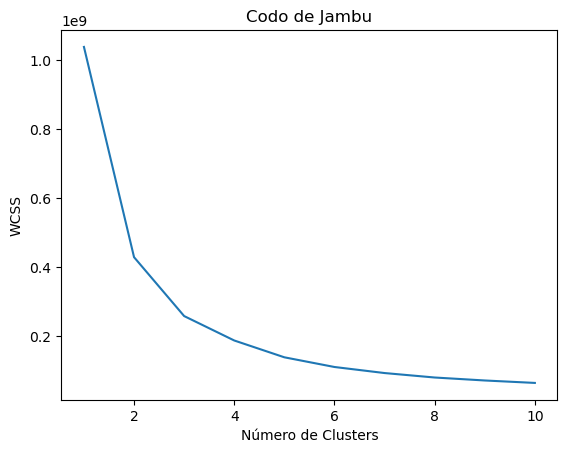

In [102]:
plt.plot (range (1,11), wcss)
plt. title( 'Codo de Jambu' )
plt.xlabel ( 'Número de Clusters')
plt.ylabel( 'WCSS') #WCSS Es un indicador de que tan similar pueden ser los datos dentro de los cluster
plt. show()

In [107]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=3 ,max_iter=300 ) #training y calculo de los centroides 
clustering.fit(cleaned_all_phonesre_train)


C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [108]:
cleaned_all_phonesre['KMeans_Cluster'] = clustering.labels_
cleaned_all_phonesre.head
#Los resultados del clustering se guardan en labels_ dentro del modelo

<bound method NDFrame.head of       price(USD)  weight(g)  battery  KMeans_Cluster
0        120.000        140     2200               1
1        100.000        140     2700               1
2        420.000        147     3000               1
3        150.000        165     4100               2
4        420.000        145     3200               1
...          ...        ...      ...             ...
1507     170.000        190     5000               0
1508     182.880        190     5000               0
1509     380.000        205     5240               0
1510     470.000        205     4600               2
1511     287.988        175     4600               2

[1512 rows x 4 columns]>

In [113]:
from sklearn.decomposition import PCA
import pandas as pd

# Inicializa PCA con 2 componentes
pca = PCA(n_components=2)

# Ajusta y transforma los datos
pca_cleaned_all_phones = pca.fit_transform(cleaned_all_phonesre_train)

# Crea un DataFrame con las componentes principales
pca_cleaned_all_phones_df = pd.DataFrame(data=pca_cleaned_all_phones, columns=['Componente_1', 'Componente_2'])

# Añade la columna de etiquetas del clúster
pca_cleaned_all_phones_df['KMeans_Cluster'] = cleaned_all_phonesre_train['KMeans_Cluster']

# Muestra el DataFrame resultante
print(pca_cleaned_all_phones_df.head())



   Componente_1  Componente_2  KMeans_Cluster
0  -2189.630549   -224.622116               1
1  -1689.655648   -243.294276               1
2  -1390.552810     77.574956               1
3   -289.592016   -189.059245               2
4  -1190.623748     78.060832               1


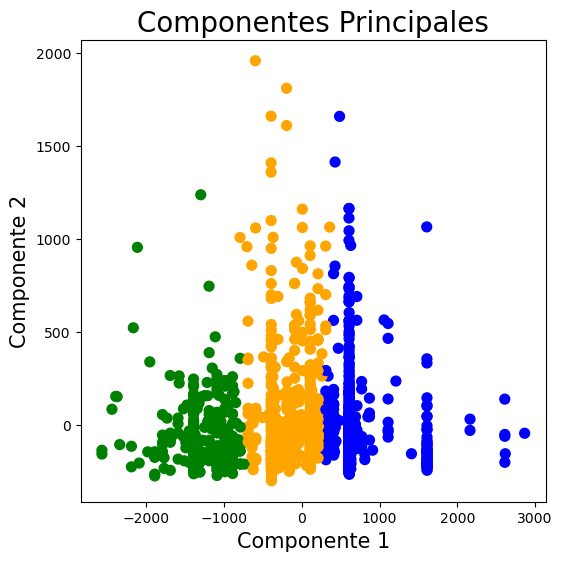

In [116]:

# Configura la figura y el eje
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Configura las etiquetas y el título
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

# Define los colores para cada clúster
color_theme = np.array(["blue", "green", "orange"])

# Grafica los datos PCA
scatter = ax.scatter(
    x=pca_cleaned_all_phones_df['Componente_1'],
    y=pca_cleaned_all_phones_df['Componente_2'],
    c=color_theme[pca_cleaned_all_phones_df['KMeans_Cluster']],
    s=50)

# Muestra la gráfica
plt.show()


In [117]:
predicciones = clustering.labels_

In [118]:
predicciones

array([1, 1, 1, ..., 0, 2, 2])

In [121]:
from sklearn import metrics 
score= metrics.adjusted_rand_score(y,predicciones)

In [123]:
print (score)

0.39241625747974507
